# Figure 1 - plots

For Figure 1. Show some examples, and cartoons, of the model. The full figure is assmebled in Keytnote. This notebook just makes the plots that go into it.

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3)
sns.set_style('ticks', {'axes.edgecolor': '0'})

plt.rcParams['axes.linewidth'] = 5
plt.rcParams['axes.labelweight'] = 5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['axes.labelweight'] = 10

from resistingrhythm.util import poisson_impulse
from resistingrhythm.util import poisson_oscillation
from resistingrhythm.util import current_pulse
from resistingrhythm.util import load_spikes
from resistingrhythm.neurons import HHH

from fakespikes.util import bin_times
from fakespikes.util import create_times

In [2]:
# plt.rcParams.keys()

In [3]:
data_path = "/Users/qualia/Code/resistingrhythm/data/"

## Shared model params

In [4]:
# General
time = 20
N = 1

# H control
homeostasis = False
Ca_target = 0.003
tau_h = 4

# Synapse parameters
V_e = 0
V_i = -80e-3
tau_e = 5e-3
tau_i = 10e-3
w = (5e-6, 50e-6)

## Spiking input

In [5]:
# Or load some input
tonic_name = os.path.join(data_path, "osc130.csv")
burst_name = os.path.join(data_path, "burst130.csv")
ns_tonic, ts_tonic = load_spikes(tonic_name)
ns_burst, ts_burst = load_spikes(burst_name)

# No modulation
# ns_osc, ts_osc = np.asarray([]), np.asarray([])
# ns_burst, ts_burst = np.asarray([]), np.asarray([])

# Stim
stim_name = os.path.join(data_path, "stim3.csv")
ns_in, ts_in = load_spikes(stim_name)

## Tonic bias?

In [6]:
# external_current = current_pulse(time, t_onset=2, t_offset=2.5, I=0.5e-6)

## Run HHH

Tonic and burst

In [7]:
tonic_results = HHH(
    time,
    ns_in,
    ts_in,
    ns_tonic,
    ts_tonic,
    external_current=None,
    N=N,
    Ca_target=Ca_target,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_e,
    V_osc=V_e,
    sigma=0,
    homeostasis=homeostasis,
    time_step=1e-5,
    seed_value=42
)

WARNING    "g_KCa" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 30. * msiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_Na" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 180. * msiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "Ca" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 3. * umolar. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_Ca" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 30. * usiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_K" is an internal variable of group "neurongroup", but also exists in the run namespa

In [8]:
tonic_results.keys()
tonic_results['v_m'].std()

0.008541691622160539

In [9]:
burst_results = HHH(
    time,
    ns_in,
    ts_in,
    ns_burst,
    ts_burst,
    external_current=None,
    N=N,
    Ca_target=Ca_target,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_e,
    V_osc=V_e,
    sigma=0,
    homeostasis=homeostasis,
    time_step=1e-5,
    seed_value=42
)

WARNING    "g_KCa" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 30. * msiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_Na" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 180. * msiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "Ca" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 3. * umolar. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_Ca" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 30. * usiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "g_K" is an internal variable of group "neurongroup_1", but also exists in the r

In [10]:
burst_results.keys()
burst_results['v_m'].std()

0.00444251761889933

## Visualize input

### Stim

No handles with labels found to put in legend.


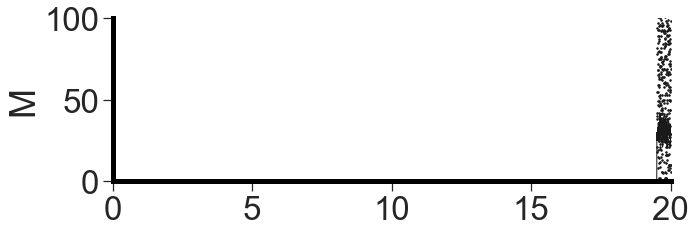

In [11]:
times, rates = bin_times(ts_in, (0, 20), 5e-3)

fig, ax = plt.subplots(1, sharex=True, figsize=(10, 3))
_ = ax.plot(ts_in, ns_in, 
               markersize=1.5, marker='o', linestyle='', color='k')#, label='Stimulus')
_ = ax.plot(times, rates, color='k', linewidth=1)
_ = ax.set_ylabel("M")
_ = ax.legend(loc='center left', bbox_to_anchor=(.9, 0.5), frameon=False)
_ = ax.set_xlim(0, 20)
_ = ax.set_ylim(0, 100)
sns.despine()

### Oscillations

No handles with labels found to put in legend.
No handles with labels found to put in legend.


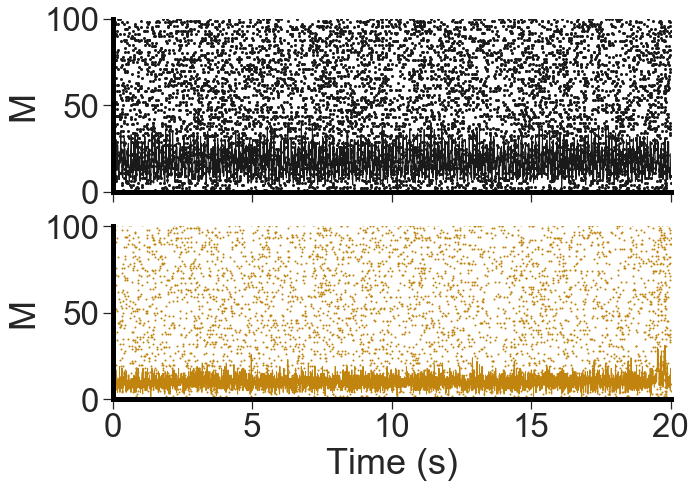

In [12]:
fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(10, 7))

times, rates = bin_times(ts_tonic, (0, 20), 5e-3)
_ = ax[0].plot(ts_tonic, ns_tonic, 
               markersize=2, marker='o', linestyle='', color='k')#, label='Tonic')
_ = ax[0].plot(times, rates, color='k', linewidth=1)
_ = ax[0].set_ylabel("M")
_ = ax[0].legend(loc='center left', bbox_to_anchor=(.9, 0.5), frameon=False)
_ = ax[0].set_ylim(0, 100)

times, rates = bin_times(ts_burst, (0, 20), 5e-3)
_ = ax[1].plot(ts_burst, ns_burst, 
               markersize=1, marker='o', linestyle='', color='#c1840e')#, label='Burst')
_ = ax[1].plot(times, rates, color='#c1840e', linewidth=1)
_ = ax[1].set_xlabel("Time (s)")
_ = ax[1].set_ylabel("M")
_ = ax[1].set_xlim(0, 20)
_ = ax[1].set_ylim(0, 100)

_ = ax[1].legend(loc='center left', bbox_to_anchor=(0.9, 0.5), frameon=False)

# plt.tight_layout()
sns.despine()

### Subpanels

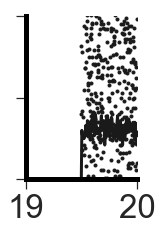

In [13]:
# plt.figure()
fig, ax = plt.subplots(1, sharex=True, figsize=(2, 3))

times, rates = bin_times(ts_in, (0, 20), 5e-3)
_ = ax.plot(ts_in, ns_in, 
               markersize=3, marker='o', linestyle='', color='k')
_ = ax.plot(times, rates, color="k", linewidth=3)
_ = ax.set_yticklabels([])
_ = ax.set_xlim(19, 20.0)
_ = ax.set_ylim(0, 100)
_ = ax.set_facecolor('white')
sns.despine()

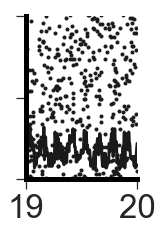

In [14]:
# plt.figure()
fig, ax = plt.subplots(1, sharex=True, figsize=(2, 3))

times, rates = bin_times(ts_tonic, (0, 20), 5e-3)
_ = ax.plot(ts_tonic, ns_tonic, 
               markersize=3, marker='o', linestyle='', color='k')
_ = ax.plot(times, rates, color="k", linewidth=3)
_ = ax.set_yticklabels([])
_ = ax.set_xlim(19, 20.0)
_ = ax.set_ylim(0, 100)
_ = ax.set_facecolor('white')
sns.despine()

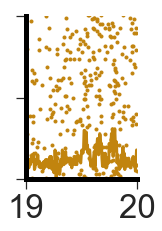

In [15]:
# plt.figure()
times, rates = bin_times(ts_burst, (0, 20), 5e-3)

fig, ax = plt.subplots(1, sharex=True, figsize=(2, 3))
_ = ax.plot(ts_burst, ns_burst, 
               markersize=3, marker='o', linestyle='', color='#c1840e')
_ = ax.plot(times, rates, color="#c1840e", linewidth=3)
_ = ax.set_yticklabels([])
_ = ax.set_xlim(19, 20.0)
_ = ax.set_ylim(0, 100)
_ = ax.set_facecolor('white')
sns.despine()

## Visualize output - traces

### Vm

<Figure size 432x288 with 0 Axes>

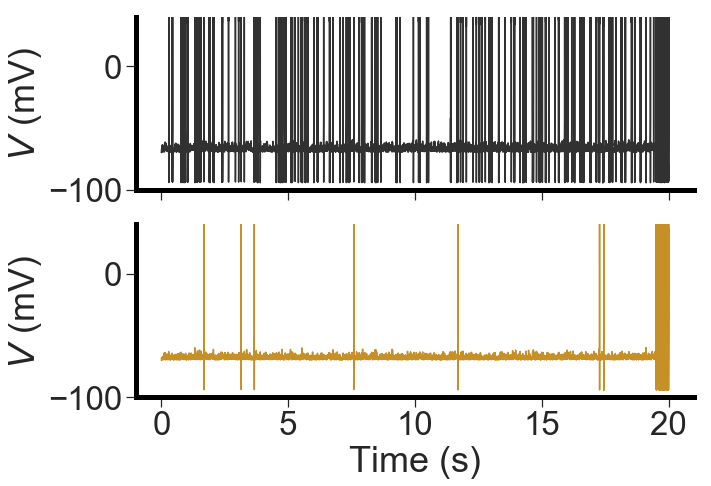

In [16]:
n = N - 1

plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))

# Vm
t = tonic_results['times']
v = tonic_results['v_m'][n, :]*1e3
_ = ax[0].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[0].set_ylabel("$V$ (mV)")
_ = ax[0].set_ylim(-100, 40)

# Vm
t = burst_results['times']
v = burst_results['v_m'][n, :]*1e3
_ = ax[1].plot(t, v, linestyle='-', linewidth=1.5, color='#c1840e', alpha=0.9)
_ = ax[1].set_ylabel("$V$ (mV)")
_ = ax[1].set_ylim(-100, 40)
_ = ax[1].set_xlabel("Time (s)")
sns.despine()

#### Conductances

<Figure size 432x288 with 0 Axes>

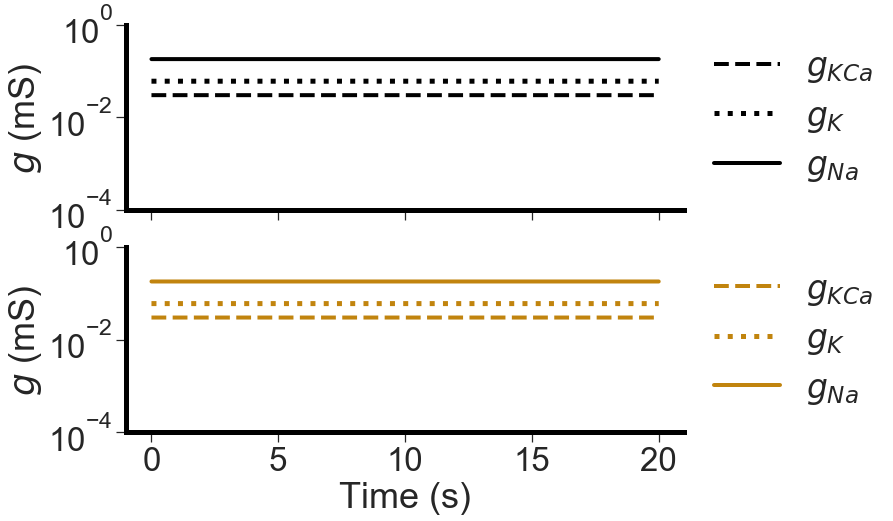

In [17]:
n = N - 1

plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7.5))


# Tonic
t = tonic_results['times']
v1 = tonic_results['g_KCa'][n, :]
v2 = tonic_results['g_K'][n, :]
v3 = tonic_results['g_Na'][n, :]
_ = ax[0].semilogy(t, v1, linestyle='dashed', linewidth=4, color='black', alpha=1, label="$g_{KCa}$")
_ = ax[0].semilogy(t, v2, linestyle='dotted', linewidth=5, color='black', alpha=1, label="$g_K$")
_ = ax[0].semilogy(t, v3, linestyle='solid', linewidth=4, color='black', alpha=1, label="$g_{Na}$")
# _ = ax[0].set_xlabel("Time (s)")
_ = ax[0].set_ylabel("$g$ (mS)")
_ = ax[0].set_ylim(1e-4, 1e0)
_ = ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Burst
t = tonic_results['times']
v1 = burst_results['g_KCa'][n, :]
v2 = burst_results['g_K'][n, :]
v3 = burst_results['g_Na'][n, :]
_ = ax[1].semilogy(t, v1, linestyle='dashed', linewidth=4, color='#c1840e', alpha=1, label="$g_{KCa}$")
_ = ax[1].semilogy(t, v2, linestyle='dotted', linewidth=5, color='#c1840e', alpha=1, label="$g_{K}$")
_ = ax[1].semilogy(t, v3, linestyle='solid', linewidth=4, color='#c1840e', alpha=1, label="$g_{Na}$")
_ = ax[1].set_xlabel("Time (s)")
_ = ax[1].set_ylabel("$g$ (mS)")
_ = ax[1].set_ylim(1e-4, 1e0)
_ = ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

sns.despine()